<a href="https://colab.research.google.com/github/EumGitae/Machine-Learning/blob/main/6week_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

첨부한 CSV 데이터에 대해서 아래와 같이 로지스틱 회귀 예측 모델을 구축하라.\
• 데이터 : Social_Network_Ads.csv( 400개 data )\
• 사용 Library : numpy, matplotlib, pandas, scikit-learn

In [207]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1. 데이터 Loading

In [208]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Data = pd.read_csv('/content/drive/MyDrive/Social_Network_Ads.csv')

2. 데이터 전처리(preprocessing), Feature 추출\
• 데이터 중 “Age”(𝑥1)와 “EstimatedSalary”(𝑥2)를 특징 벡터(X)로 사용\
• "Purchased”를 실제값(y)로 사용

In [209]:
# 각각의 특징 추출
x1 = Data['Age'].values.reshape(-1, 1)               # x1의 shape = (400, 1)
x2 = Data['EstimatedSalary'].values.reshape(-1, 1)   # x2의 shape = (400, 1)

# 두 feature를 하나의 특징벡터 X로 결합 -> X = [x1, x2]
X = np.hstack((x1, x2))                              # X의 shape = (400, 2)

# 실제값 추출 -> y: 구매 여부 (Purchased)
y = Data['Purchased'].values.reshape(-1,1)           # y의 shape = (400, 1)

# 정규화 (Z-score)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

# 각 feature의 shape 확인
print("x1:", x1.shape)
print("x2:", x2.shape)
print("X:", X.shape)
print("y:", y.shape,'\n')

# 추출이 됐는지 확인
print("x1:\n", x1[:5],'\n')
print("x2:\n", x2[:5],'\n')
print("X:\n", X[:5],'\n')
print("y:", y[:5])

x1: (400, 1)
x2: (400, 1)
X: (400, 2)
y: (400, 1) 

x1:
 [[19]
 [35]
 [26]
 [27]
 [19]] 

x2:
 [[19000]
 [20000]
 [43000]
 [57000]
 [76000]] 

X:
 [[-1.78179743 -1.49004624]
 [-0.25358736 -1.46068138]
 [-1.11320552 -0.78528968]
 [-1.01769239 -0.37418169]
 [-1.78179743  0.18375059]] 

y: [[0]
 [0]
 [0]
 [0]
 [0]]


3. 학습 데이터를 데이터의 80%(320개), 테스트 데이터를 20%(80개)로 분할 사용\
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [210]:
from sklearn.model_selection import train_test_split

# 데이터 분할: 80% 학습 데이터, 20% 테스트 데이터
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# 분할 결과 확인
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)


X_train: (320, 2)
X_test: (80, 2)
y_train: (320, 1)
y_test: (80, 1)


4. 학습데이터에 대해 로지스틱회귀 모델 구성\
• 예측 함수 : Sigmoid 함수 h(x) = 𝜎(w0 + w1𝑥1 + w2𝑥2)\
• 손실(Cost) 함수: 교차 엔트로피 오차 ∈_CEE=-∑_(i=1)^m{yi ln pi + (1 - yi ) ln(1 - pi )}〗

In [211]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Bias 항 추가
X_train_bias = np.hstack([np.ones((X_train.shape[0], 1)), X_train]) #shape: (320,3)

# 초기 가중치
w = np.zeros((X_train_bias.shape[1], 1))  # shape: (3, 1)

# 손실 함수 (교차 엔트로피)
def lost_function(X, y, w):
    m = len(y_train)
    p = sigmoid(X_train_bias @ w)
    cost = -(1/m) * (y_train.T @  np.log(p) + (1 - y_train).T * np.log(1 - p))
    return cost

5. 경사하강법을 이용해서 모델 학습하고, 파라미터 값 출력 print(w0, w1
, w2
)

In [212]:
# 경사하강법 함수
def gradient_descent(X, y, w, Learning_rate, epoch):
    m = len(y)
    for _ in range(epoch):
        p = sigmoid(X @ w)
        dw = (1/m) * X.T @ (p - y)
        w = w - Learning_rate * dw
    return w

# 경사하강법 실행
w_learned = gradient_descent(X_train_bias, y_train, w, Learning_rate=0.001, epoch=100000)

# 파라미터 값 출력
w0 = w_learned[0, 0]
w1 = w_learned[1, 0]
w2 = w_learned[2, 0]

print("w0 =", w0)
print("w1 =", w1)
print("w2 =", w2)

w0 = -1.1183592481074742
w1 = 2.1868484848570278
w2 = 1.0866824869548877


6. 모델의 시각화


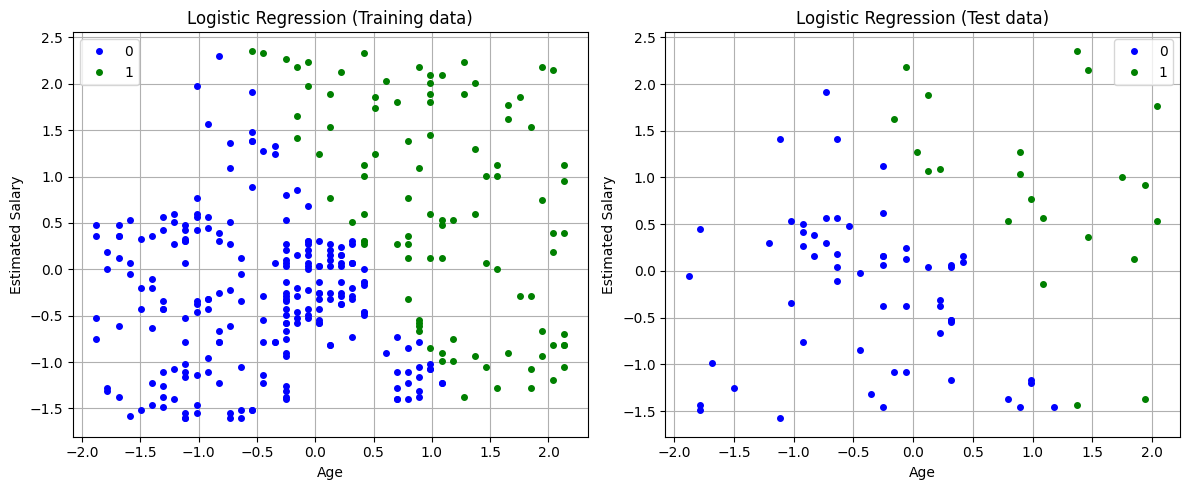

In [213]:
# Bias 포함된 학습/테스트 데이터
X = np.hstack([np.ones((X_train.shape[0], 1)), X_train])          # shape: (320, 3)
X_test_bias = np.hstack([np.ones((X_test.shape[0], 1)), X_test])  # shape: (80, 3)

# 경사하강법으로 가중치 학습
w = gradient_descent(X, y_train, np.zeros((3, 1)), Learning_rate=0.001, epoch=100000)

# train 데이터 예측
y_prob = sigmoid(X @ w)
y_bool = y_prob > 0.5
C1 = np.where(y_bool == True)[0]
C0 = np.where(y_bool == False)[0]

# test 데이터 예측
y_test_prob = sigmoid(X_test_bias @ w)
y_test_bool = y_test_prob > 0.5
C1_test = np.where(y_test_bool == True)[0]
C0_test = np.where(y_test_bool == False)[0]

# 시각화
plt.figure(figsize=(12, 5))

# 왼쪽: 훈련 데이터
plt.subplot(1, 2, 1)
plt.plot(X[C0, 1], X[C0, 2], 'bo', markersize=4, label='0')
plt.plot(X[C1, 1], X[C1, 2], 'go', markersize=4, label='1')
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.title("Logistic Regression (Training data)")
plt.legend()
plt.grid(True)

# 오른쪽: 테스트 데이터
plt.subplot(1, 2, 2)
plt.plot(X_test[C0_test, 0], X_test[C0_test, 1], 'bo', markersize=4, label='0')
plt.plot(X_test[C1_test, 0], X_test[C1_test, 1], 'go', markersize=4, label='1')
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.title("Logistic Regression (Test data)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


7. scikit-learn Library를 이용, 모델학습하고, 파라미터 값 출력 print(w0, w1, w2)


In [214]:
from sklearn import linear_model

# 모델 생성 및 학습
clf = linear_model.LogisticRegression(solver = 'lbfgs')
clf.fit(X_train, y_train.ravel())

w0 = clf.intercept_[0]     # 절편 (bias term)
w1 = clf.coef_[0,0]        # Age에 대한 가중치
w2 = clf.coef_[0,1]        # Estimated Salary에 대한 가중치

# 파라미터 출력
print("w0 =", w0)
print("w1 =", w1)
print("w2 =", w2)

w0 = -1.0814202718040924
w1 = 2.056989889669858
w2 = 1.022448160871522


8. 모델의 시각화

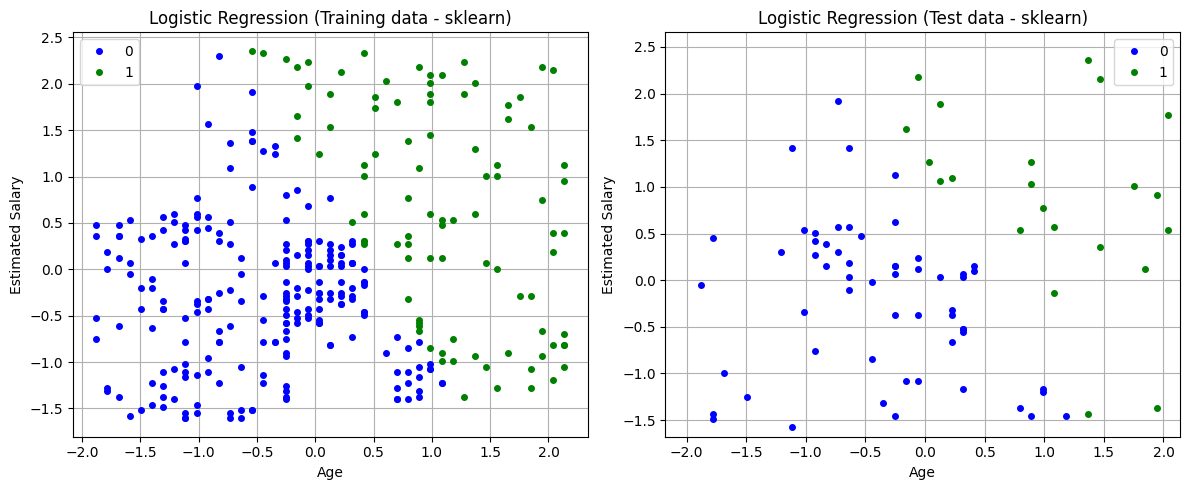

In [215]:
# Bias 포함된 학습/테스트 데이터
X_train_bias = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
X_test_bias = np.hstack([np.ones((X_test.shape[0], 1)), X_test])

# sklearn 파라미터를 w 벡터로 구성
w_sklearn = np.array([[w0], [w1], [w2]])

# sklearn-train 데이터 예측
y_train_prob = sigmoid(X_train_bias @ w_sklearn)
y_train_pred = y_train_prob > 0.5
C1 = np.where(y_train_pred == True)[0]
C0 = np.where(y_train_pred == False)[0]

# sklearn-test 데이터 예측
y_test_prob = sigmoid(X_test_bias @ w_sklearn)
y_test_pred = y_test_prob > 0.5
C1_test = np.where(y_test_pred == True)[0]
C0_test = np.where(y_test_pred == False)[0]

# 시각화
plt.figure(figsize=(12, 5))

# 왼쪽: train 데이터
plt.subplot(1, 2, 1)
plt.plot(X_train[C0, 0], X_train[C0, 1], 'bo', markersize=4, label='0')
plt.plot(X_train[C1, 0], X_train[C1, 1], 'go', markersize=4, label='1')
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.title("Logistic Regression (Training data - sklearn)")
plt.grid(True)
plt.legend()

# 오른쪽: test 데이터
plt.subplot(1, 2, 2)
plt.plot(X_test[C0_test, 0], X_test[C0_test, 1], 'bo', markersize=4, label='0')
plt.plot(X_test[C1_test, 0], X_test[C1_test, 1], 'go', markersize=4, label='1')
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.xlim(X_test[:, 0].min() - 0.3, X_test[:, 0].max() + 0.1)
plt.ylim(X_test[:, 1].min() - 0.1, X_test[:, 1].max() + 0.3)
plt.title("Logistic Regression (Test data - sklearn)")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

분류 경계선(Decision Boundary) plot

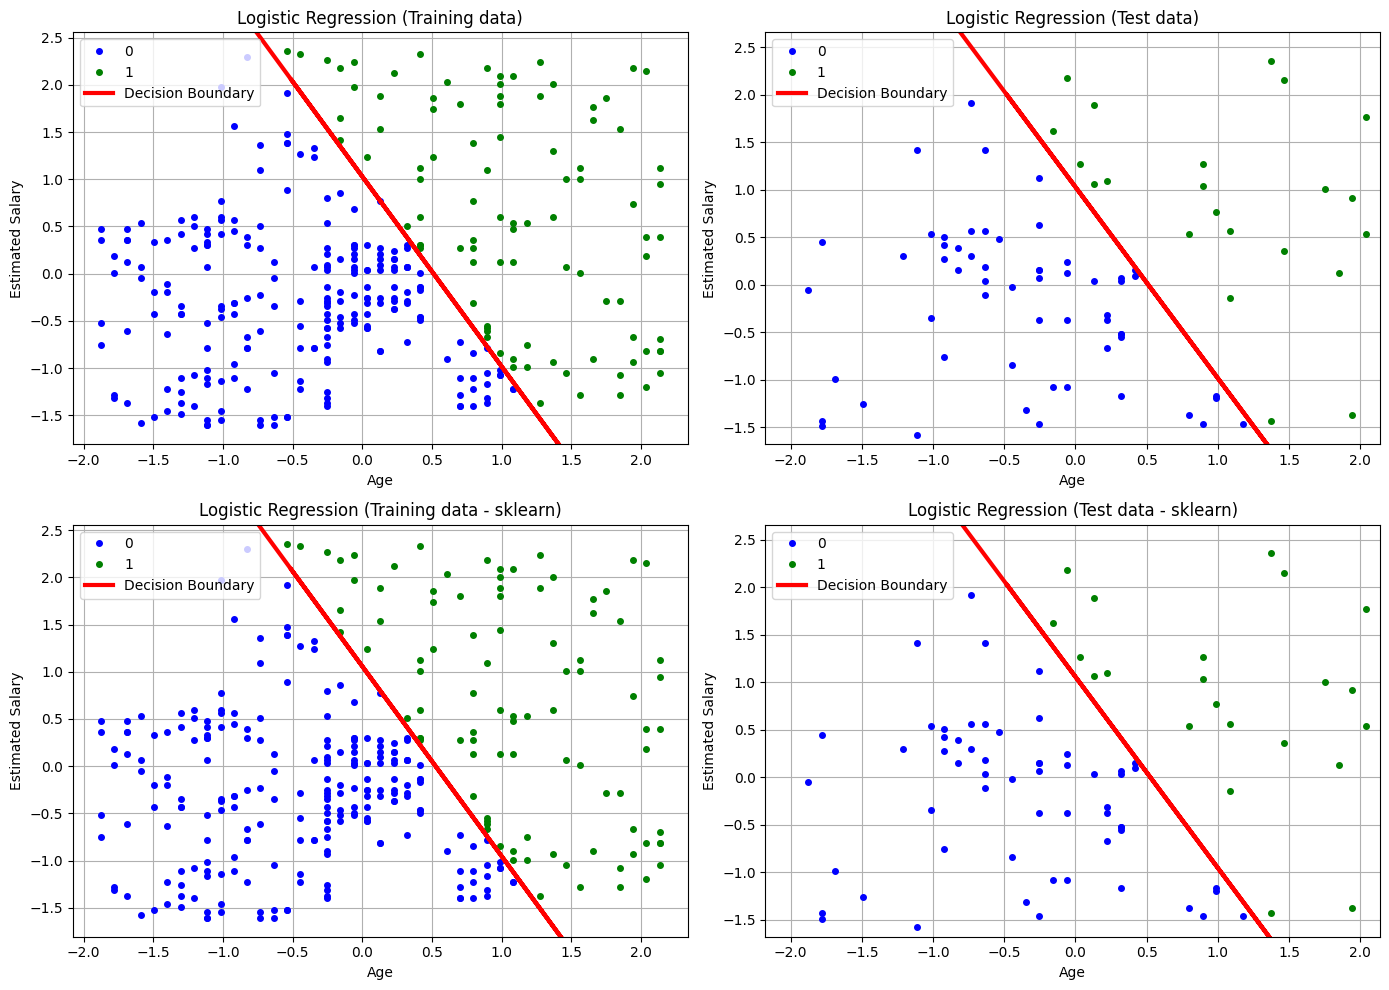

In [216]:
# Bias 포함된 학습/테스트 데이터
X = np.hstack([np.ones((X_train.shape[0], 1)), X_train])          # shape: (320, 3)
X_test_bias = np.hstack([np.ones((X_test.shape[0], 1)), X_test])  # 이 줄이 중요! shape: (80, 3)

# 경사하강법으로 가중치 학습
w = gradient_descent(X, y_train, np.zeros((3, 1)), Learning_rate=0.001, epoch=100000)

# 모델 생성 및 학습
clf = linear_model.LogisticRegression(solver = 'lbfgs')
clf.fit(X_train, y_train.ravel())

w0 = clf.intercept_[0]     # 절편 (bias term)
w1 = clf.coef_[0,0]        # Age에 대한 가중치
w2 = clf.coef_[0,1]        # Estimated Salary에 대한 가중치
w_sklearn = np.array([[w0], [w1], [w2]])

plt.figure(figsize=(14, 10))

# train 데이터 예측
y_prob = sigmoid(X @ w)
y_bool = y_prob > 0.5
C1 = np.where(y_bool == True)[0]
C0 = np.where(y_bool == False)[0]

# test 데이터 예측
y_test_prob = sigmoid(X_test_bias @ w)
y_test_bool = y_test_prob > 0.5
C1_test = np.where(y_test_bool == True)[0]
C0_test = np.where(y_test_bool == False)[0]

# sklearn-train 데이터 예측
y_train_prob = sigmoid(X_train_bias @ w_sklearn)
y_train_pred = y_train_prob > 0.5
C1 = np.where(y_train_pred == True)[0]
C0 = np.where(y_train_pred == False)[0]

# sklearn-test 데이터 예측
y_test_prob = sigmoid(X_test_bias @ w_sklearn)
y_test_pred = y_test_prob > 0.5
C1_test = np.where(y_test_pred == True)[0]
C0_test = np.where(y_test_pred == False)[0]

# 경사하강법 - train 데이터
plt.subplot(2, 2, 1)
plt.plot(X[C0, 1], X[C0, 2], 'bo', markersize=4, label='0')
plt.plot(X[C1, 1], X[C1, 2], 'go', markersize=4, label='1')
x_vals = np.linspace([X_train[:, 1].min()-1, X_train[:, 1].max()+1],100).reshape(-1,1)
y_vals = -(w[1,0] / w[2,0]) * x_vals - (w[0,0] / w[2,0])
plt.plot(x_vals, y_vals, 'r-', linewidth=3, label='Decision Boundary')
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.xlim(X[:, 1].min() - 0.2, X[:, 1].max() + 0.2)
plt.ylim(X[:, 2].min() - 0.2, X[:, 2].max() + 0.2)
plt.title("Logistic Regression (Training data)")
plt.legend()
plt.grid(True)

# 경사하강법 - test 데이터
plt.subplot(2, 2, 2)
plt.plot(X_test[C0_test, 0], X_test[C0_test, 1], 'bo', markersize=4, label='0')
plt.plot(X_test[C1_test, 0], X_test[C1_test, 1], 'go', markersize=4, label='1')
x_vals = np.linspace([X_test[:, 1].min()-1, X_test[:, 1].max()+1],100).reshape(-1,1)
y_vals = -(w[1,0] / w[2,0]) * x_vals - (w[0,0] / w[2,0])
plt.plot(x_vals, y_vals, 'r-', linewidth=3, label='Decision Boundary')
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.xlim(X_test[:, 0].min() - 0.3, X_test[:, 0].max() + 0.1)
plt.ylim(X_test[:, 1].min() - 0.1, X_test[:, 1].max() + 0.3)
plt.title("Logistic Regression (Test data)")
plt.legend()
plt.grid(True)

# sklearn - train 데이터
plt.subplot(2, 2, 3)
plt.plot(X_train[C0, 0], X_train[C0, 1], 'bo', markersize=4, label='0')
plt.plot(X_train[C1, 0], X_train[C1, 1], 'go', markersize=4, label='1')
x_vals = np.linspace([X_train[:, 1].min()-1, X_train[:, 1].max()+1],100).reshape(-1,1)
y_vals = -(w1 / w2) * x_vals - (w0 / w2)
plt.plot(x_vals, y_vals, 'r-', linewidth=3, label='Decision Boundary')
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.xlim(X[:, 1].min() - 0.2, X[:, 1].max() + 0.2)
plt.ylim(X[:, 2].min() - 0.2, X[:, 2].max() + 0.2)
plt.title("Logistic Regression (Training data - sklearn)")
plt.grid(True)
plt.legend()

# sklearn - test 데이터
plt.subplot(2, 2, 4)
plt.plot(X_test[C0_test, 0], X_test[C0_test, 1], 'bo', markersize=4, label='0')
plt.plot(X_test[C1_test, 0], X_test[C1_test, 1], 'go', markersize=4, label='1')
x_vals = np.linspace([X_test[:, 1].min()-1, X_test[:, 1].max()+1],100).reshape(-1,1)
y_vals = -(w1 / w2) * x_vals - (w0 / w2)
plt.plot(x_vals, y_vals, 'r-', linewidth=3, label='Decision Boundary')
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.xlim(X_test[:, 0].min() - 0.3, X_test[:, 0].max() + 0.1)
plt.ylim(X_test[:, 1].min() - 0.1, X_test[:, 1].max() + 0.3)
plt.title("Logistic Regression (Test data - sklearn)")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

(평가외 추가 코딩) 로지스틱회귀로 얻은 예측값(y_pred)을 테스트 데이터로 평가해보기\
y_pred = classifier.predict(X_test) # 테스트 데이터만 사용됨\
result = sklearn.metrics.accuracy_score(y_test, y_pred) # 모델의 정확도

In [217]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# 모델 학습 (train 데이터 사용)
classifier = LogisticRegression(solver='lbfgs')
classifier.fit(X_train, y_train.ravel())

# 예측 (test 데이터 사용)
y_pred = classifier.predict(X_test)              # 테스트 데이터만 사용됨

# 정확도 평가
result = metrics.accuracy_score(y_test, y_pred)  # 모델의 정확도

# 출력
print(result)


0.8625
